# Agenda, day 3

1. Q&A
2. Sorting
3. Grouping (basic, advanced)
4. Pivot tables
5. Joining
6. Cleaning our data
7. Plotting
8. AMA -- ask me anything
9. What's next?

# Sorting

In Python, we have two ways to sort things:

- `list.sort` method, which changes the list (so we try to avoid using it)
- `sorted` builtin function, which takes any sequence of values and returns a list, with them in ascending order

You don't want to use `sorted` with a Python series or data frame! If it works,  it'll be very slow and it won't give you the control that you want.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
filename = 'taxi.csv'

df = pd.read_csv(filename,
                 index_col='tpep_pickup_datetime')
df

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-02 11:19:29,2,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
2015-06-02 11:19:30,2,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2015-06-02 11:19:31,2,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
2015-06-02 11:19:31,2,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
2015-06-02 11:19:32,1,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-01 00:12:59,1,2015-06-01 00:24:18,1,2.70,-73.947792,40.814972,1,N,-73.973358,40.783638,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30
2015-06-01 00:12:59,1,2015-06-01 00:28:16,1,4.50,-74.004066,40.747818,1,N,-73.953758,40.779285,1,16.0,0.5,0.5,3.00,0.0,0.3,20.30
2015-06-01 00:13:00,2,2015-06-01 00:37:25,1,5.59,-73.994377,40.766102,1,N,-73.903206,40.750546,2,21.0,0.5,0.5,0.00,0.0,0.3,22.30


In [3]:
# how can I sort this?

# first: I want to find the shortest trip distance
df['trip_distance']

tpep_pickup_datetime
2015-06-02 11:19:29    1.63
2015-06-02 11:19:30    0.46
2015-06-02 11:19:31    0.87
2015-06-02 11:19:31    2.13
2015-06-02 11:19:32    1.40
                       ... 
2015-06-01 00:12:59    2.70
2015-06-01 00:12:59    4.50
2015-06-01 00:13:00    5.59
2015-06-01 00:13:02    1.54
2015-06-01 00:13:04    5.80
Name: trip_distance, Length: 9999, dtype: float64

In [4]:
# we can run the sort_values method on a series, and we'll get the values back, sorted from smallest to largest
# (in ascending order)

df['trip_distance'].sort_values()

tpep_pickup_datetime
2015-06-01 00:12:13     0.00
2015-06-04 15:18:09     0.00
2015-06-02 11:23:46     0.00
2015-06-01 00:08:03     0.00
2015-06-01 00:07:43     0.00
                       ...  
2015-06-04 15:17:25    34.84
2015-06-02 11:21:03    35.51
2015-06-01 00:02:42    37.20
2015-06-01 00:04:50    60.30
2015-06-01 00:00:58    64.60
Name: trip_distance, Length: 9999, dtype: float64

In [5]:
# I want the 10 shortest trips

df['trip_distance'].sort_values().head(10)

tpep_pickup_datetime
2015-06-01 00:12:13    0.0
2015-06-04 15:18:09    0.0
2015-06-02 11:23:46    0.0
2015-06-01 00:08:03    0.0
2015-06-01 00:07:43    0.0
2015-06-04 15:23:02    0.0
2015-06-06 16:51:57    0.0
2015-06-04 15:18:40    0.0
2015-06-01 00:03:44    0.0
2015-06-04 15:17:31    0.0
Name: trip_distance, dtype: float64

In [6]:
# I want the 10 longest trips

df['trip_distance'].sort_values().tail(10)

tpep_pickup_datetime
2015-06-01 00:00:16    29.78
2015-06-01 00:09:14    31.50
2015-06-01 00:00:13    31.90
2015-06-02 11:28:58    32.10
2015-06-01 00:01:19    32.40
2015-06-04 15:17:25    34.84
2015-06-02 11:21:03    35.51
2015-06-01 00:02:42    37.20
2015-06-01 00:04:50    60.30
2015-06-01 00:00:58    64.60
Name: trip_distance, dtype: float64

In [8]:
# another way:

df['trip_distance'].sort_values(ascending=False).head(10)

tpep_pickup_datetime
2015-06-01 00:00:58    64.60
2015-06-01 00:04:50    60.30
2015-06-01 00:02:42    37.20
2015-06-02 11:21:03    35.51
2015-06-04 15:17:25    34.84
2015-06-01 00:01:19    32.40
2015-06-02 11:28:58    32.10
2015-06-01 00:00:13    31.90
2015-06-01 00:09:14    31.50
2015-06-01 00:00:16    29.78
Name: trip_distance, dtype: float64

In [9]:
# why don't we just have a "sorted" function or method for Pandas?
# we don't always want to sort by the value. Sometimes, we want to sort by the index.

df['trip_distance'].sort_index()

tpep_pickup_datetime
2015-06-01 00:00:00     1.00
2015-06-01 00:00:00     1.40
2015-06-01 00:00:00     0.90
2015-06-01 00:00:01     8.15
2015-06-01 00:00:01     1.20
                       ...  
2015-06-06 16:53:56     1.20
2015-06-06 16:53:56     1.30
2015-06-06 16:53:56    17.36
2015-06-06 16:53:56     0.58
2015-06-06 16:53:57     0.50
Name: trip_distance, Length: 9999, dtype: float64

In [10]:
df['trip_distance'].sort_index(ascending=False)

tpep_pickup_datetime
2015-06-06 16:53:57    0.50
2015-06-06 16:53:56    0.76
2015-06-06 16:53:56    3.20
2015-06-06 16:53:56    1.31
2015-06-06 16:53:56    1.36
                       ... 
2015-06-01 00:00:01    1.20
2015-06-01 00:00:01    7.41
2015-06-01 00:00:00    1.00
2015-06-01 00:00:00    1.40
2015-06-01 00:00:00    0.90
Name: trip_distance, Length: 9999, dtype: float64

In [11]:
df['trip_distance'].sort_index().head(10)

tpep_pickup_datetime
2015-06-01 00:00:00    1.00
2015-06-01 00:00:00    1.40
2015-06-01 00:00:00    0.90
2015-06-01 00:00:01    8.15
2015-06-01 00:00:01    1.20
2015-06-01 00:00:01    7.41
2015-06-01 00:00:02    5.51
2015-06-01 00:00:02    9.04
2015-06-01 00:00:02    4.52
2015-06-01 00:00:03    2.59
Name: trip_distance, dtype: float64

# Sorting a series/column

When you sort a series(column), you can choose between:'

- `sort_values`, to get a new series back based on the values, sorted in ascending order (by default)
- `sort_index`, to get a new series back based on on the index, sorted in ascending order (by default)

# What about sorting data frames?

Remember that if you know a method for a series, then you probably know that method for a data frame, too. Applying it to the data frame will work on all of the columns.

In this case, that's *definitely* true for `sort_index`. You can run `sort_index` on a data frame, and it'll work just fine, sorting the rows of the data base based on the index values.

In [12]:
df.sort_index()

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-01 00:00:00,1,2015-06-01 00:06:12,1,1.00,-73.988739,40.756832,1,N,-73.974701,40.757038,2,6.0,0.5,0.5,0.00,0.00,0.3,7.30
2015-06-01 00:00:00,2,2015-06-01 00:00:00,2,1.40,-73.987160,40.738972,1,N,-73.976288,40.755573,2,11.5,0.0,0.5,0.00,0.00,0.3,12.30
2015-06-01 00:00:00,2,2015-06-01 00:00:00,1,0.90,-73.984428,40.737209,1,N,-73.979935,40.749088,1,11.5,1.0,0.5,2.00,0.00,0.3,15.30
2015-06-01 00:00:01,2,2015-06-01 00:24:48,1,8.15,-74.006844,40.730572,1,N,-73.946342,40.811508,1,26.5,0.5,0.5,2.50,0.00,0.3,30.30
2015-06-01 00:00:01,1,2015-06-01 00:08:26,3,1.20,-73.981827,40.770767,1,N,-73.994957,40.764378,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-06 16:53:56,1,2015-06-06 17:00:40,1,1.20,-73.992592,40.730629,1,N,-73.998161,40.717072,1,6.5,0.0,0.5,2.19,0.00,0.3,9.49
2015-06-06 16:53:56,1,2015-06-06 17:00:10,1,1.30,-73.973396,40.789967,1,N,-73.958511,40.779106,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
2015-06-06 16:53:56,2,2015-06-06 17:54:22,1,17.36,-73.790520,40.646461,2,N,-73.969048,40.763062,1,52.0,0.0,0.5,10.66,5.54,0.3,69.00


In [13]:
# what about sort_values? 

df.sort_values()   # this raises the question -- by which values? By which column?

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [14]:
df.sort_values('trip_distance')

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-01 00:12:13,1,2015-06-01 00:13:47,1,0.00,-74.005714,40.740582,1,N,-74.005417,40.740803,3,3.00,0.5,0.5,0.00,0.00,0.3,4.30
2015-06-04 15:18:09,1,2015-06-04 15:18:09,2,0.00,-74.002953,40.749256,1,N,0.000000,0.000000,2,3.00,0.0,0.5,0.00,0.00,0.3,3.80
2015-06-02 11:23:46,2,2015-06-02 11:24:07,4,0.00,-73.956963,40.766392,1,N,-73.956970,40.766418,2,2.50,0.0,0.5,0.00,0.00,0.3,3.30
2015-06-01 00:08:03,2,2015-06-01 00:08:08,1,0.00,-73.962463,40.755138,2,N,-73.962463,40.755138,1,52.00,0.0,0.5,10.56,0.00,0.3,63.36
2015-06-01 00:07:43,1,2015-06-01 00:07:43,1,0.00,-74.007530,40.740753,1,N,0.000000,0.000000,2,5.00,0.5,0.5,0.00,0.00,0.3,6.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-04 15:17:25,2,2015-06-04 17:05:42,1,34.84,-73.787354,40.641670,5,N,-74.177376,40.690781,2,120.00,0.0,0.0,0.00,17.29,0.3,137.59
2015-06-02 11:21:03,2,2015-06-02 12:16:47,1,35.51,-73.789169,40.647758,3,N,-74.176750,40.662647,1,112.00,0.0,0.0,0.00,22.83,0.3,135.13
2015-06-01 00:02:42,1,2015-06-01 00:03:38,1,37.20,-73.550156,41.043472,5,N,-73.550102,41.043495,1,184.00,0.0,0.0,20.00,5.84,0.3,210.14


In [15]:
df.sort_values('trip_distance', ascending=False)

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-01 00:00:58,1,2015-06-01 01:22:05,1,64.60,0.000000,0.000000,5,N,0.000000,0.000000,2,69.66,0.0,0.0,0.00,10.00,0.3,79.96
2015-06-01 00:04:50,1,2015-06-01 01:31:44,1,60.30,-73.994415,40.750603,5,N,-73.420250,41.137344,1,150.00,0.0,0.0,0.00,9.75,0.3,160.05
2015-06-01 00:02:42,1,2015-06-01 00:03:38,1,37.20,-73.550156,41.043472,5,N,-73.550102,41.043495,1,184.00,0.0,0.0,20.00,5.84,0.3,210.14
2015-06-02 11:21:03,2,2015-06-02 12:16:47,1,35.51,-73.789169,40.647758,3,N,-74.176750,40.662647,1,112.00,0.0,0.0,0.00,22.83,0.3,135.13
2015-06-04 15:17:25,2,2015-06-04 17:05:42,1,34.84,-73.787354,40.641670,5,N,-74.177376,40.690781,2,120.00,0.0,0.0,0.00,17.29,0.3,137.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-01 00:01:38,1,2015-06-01 00:01:53,1,0.00,-74.005486,40.711548,2,N,-74.005661,40.711765,1,52.00,0.0,0.5,10.55,0.00,0.3,63.35
2015-06-04 15:17:31,2,2015-06-04 15:17:34,1,0.00,0.000000,0.000000,5,N,0.000000,0.000000,1,105.00,0.0,0.0,21.06,0.00,0.3,126.36
2015-06-01 00:01:20,1,2015-06-01 00:01:44,1,0.00,-73.838593,40.932640,5,N,-73.838593,40.932644,1,30.00,0.0,0.0,0.00,0.00,0.3,30.30


In [20]:
# what if we want to sort by *two* columns? That is, maybe I want to sort primarily by trip_distance,
# but secondarily by total_amount. 

# I can pass sort_values a list of columns, instead of a string with one column name.

(
    df
    .sort_values(['trip_distance', 'total_amount'])  # first sort by trip_distance. If there's a tie, use total_amount to break it
    [['trip_distance', 'total_amount']]
    .head(10)
)

,trip_distance,total_amount
tpep_pickup_datetime,,
2015-06-02 11:24:35,0.0,-3.3
2015-06-02 11:20:23,0.0,2.3
2015-06-02 11:19:46,0.0,3.3
2015-06-02 11:24:35,0.0,3.3
2015-06-02 11:23:46,0.0,3.3
2015-06-02 11:31:47,0.0,3.3
2015-06-02 11:28:53,0.0,3.3
2015-06-02 11:29:48,0.0,3.3
2015-06-02 11:31:46,0.0,3.3


# There are some special methods that do this for us (in many ways)!

- `nsmallest`
- `nlargest`

Each of these methods runs on a series with just one optional argument, the value of *n*, for the "top n values."

In [21]:
df['trip_distance'].nsmallest()

tpep_pickup_datetime
2015-06-02 11:21:25    0.0
2015-06-02 11:19:46    0.0
2015-06-02 11:20:23    0.0
2015-06-02 11:24:33    0.0
2015-06-02 11:24:35    0.0
Name: trip_distance, dtype: float64

In [22]:
df['trip_distance'].nsmallest(12)

tpep_pickup_datetime
2015-06-02 11:21:25    0.0
2015-06-02 11:19:46    0.0
2015-06-02 11:20:23    0.0
2015-06-02 11:24:33    0.0
2015-06-02 11:24:35    0.0
2015-06-02 11:20:46    0.0
2015-06-02 11:23:16    0.0
2015-06-02 11:23:46    0.0
2015-06-02 11:24:27    0.0
2015-06-02 11:25:01    0.0
2015-06-02 11:29:32    0.0
2015-06-02 11:31:47    0.0
Name: trip_distance, dtype: float64

In [23]:
df['trip_distance'].nlargest(6)

tpep_pickup_datetime
2015-06-01 00:00:58    64.60
2015-06-01 00:04:50    60.30
2015-06-01 00:02:42    37.20
2015-06-02 11:21:03    35.51
2015-06-04 15:17:25    34.84
2015-06-01 00:01:19    32.40
Name: trip_distance, dtype: float64

In [24]:
# for an entire data frame, we need to specify the column(s) on which we're comparing ("columns")
# we can also specify the number we want with the "n" parameter

df.nlargest(columns='trip_distance', n=12)

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-01 00:00:58,1,2015-06-01 01:22:05,1,64.60,0.000000,0.000000,5,N,0.000000,0.000000,2,69.66,0.0,0.0,0.00,10.00,0.3,79.96
2015-06-01 00:04:50,1,2015-06-01 01:31:44,1,60.30,-73.994415,40.750603,5,N,-73.420250,41.137344,1,150.00,0.0,0.0,0.00,9.75,0.3,160.05
2015-06-01 00:02:42,1,2015-06-01 00:03:38,1,37.20,-73.550156,41.043472,5,N,-73.550102,41.043495,1,184.00,0.0,0.0,20.00,5.84,0.3,210.14
2015-06-02 11:21:03,2,2015-06-02 12:16:47,1,35.51,-73.789169,40.647758,3,N,-74.176750,40.662647,1,112.00,0.0,0.0,0.00,22.83,0.3,135.13
2015-06-04 15:17:25,2,2015-06-04 17:05:42,1,34.84,-73.787354,40.641670,5,N,-74.177376,40.690781,2,120.00,0.0,0.0,0.00,17.29,0.3,137.59
2015-06-01 00:01:19,2,2015-06-01 00:40:12,1,32.40,-73.781425,40.644905,2,N,-73.974174,40.731441,1,52.00,0.0,0.5,10.56,0.00,0.3,63.36
2015-06-02 11:28:58,1,2015-06-02 12:13:29,1,32.10,-73.873085,40.774124,4,N,-73.957283,41.098221,1,129.00,0.0,0.5,27.05,5.54,0.3,162.39
2015-06-01 00:00:13,1,2015-06-01 00:41:05,1,31.90,-73.875206,40.770382,5,N,-73.549629,41.043552,1,210.00,0.0,0.0,42.05,0.00,0.3,252.35
2015-06-01 00:09:14,1,2015-06-01 01:03:11,1,31.50,-73.802437,40.677372,5,N,-74.255424,40.745316,2,140.00,0.0,0.0,0.00,9.75,0.3,150.05


In [26]:
df.nsmallest(columns='tip_amount', n=12)

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-02 11:19:29,2,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.0,0.0,0.3,17.8
2015-06-02 11:19:32,1,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.0,0.0,0.3,10.3
2015-06-02 11:19:36,2,2015-06-02 11:45:19,1,1.27,-73.991432,40.749306,1,N,-73.985062,40.759525,2,15.0,0.0,0.5,0.0,0.0,0.3,15.8
2015-06-02 11:19:38,2,2015-06-02 11:19:43,3,0.01,0.000000,0.000000,2,N,0.000000,0.000000,2,52.0,0.0,0.5,0.0,0.0,0.3,52.8
2015-06-02 11:19:40,2,2015-06-02 11:34:34,1,1.14,-73.950104,40.777283,1,N,-73.954102,40.763763,2,10.5,0.0,0.5,0.0,0.0,0.3,11.3
2015-06-02 11:19:41,2,2015-06-02 11:29:59,1,1.28,-73.992508,40.728512,1,N,-73.995743,40.740971,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8
2015-06-02 11:19:42,1,2015-06-02 11:22:33,2,0.60,-73.971939,40.781902,1,N,-73.978149,40.777328,2,4.0,0.0,0.5,0.0,0.0,0.3,4.8
2015-06-02 11:19:44,1,2015-06-02 11:30:31,1,0.70,-73.958519,40.781433,1,N,-73.959229,40.774303,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8
2015-06-02 11:19:47,1,2015-06-02 11:26:48,1,1.10,-73.955643,40.776382,1,N,-73.960464,40.765522,2,6.5,0.0,0.5,0.0,0.0,0.3,7.3


# Exercise: Olympic records

1. Get the Olympic data file from https://github.com/reuven/OReilly-2026-02February-pandas/blob/main/olympic_athlete_events.csv (i.e., the course's GitHub repo) and click on the "download" icon.
2. Find the 10 heaviest athletes to ever compete in the Olympics. What are their names, and what teams did they play for? Find this information first using `sort_values` and then using `nlargest`.
3. Find the 10 shortest athletes. How old were they, on average? Once again, do this once with `sort_values` and once with `nsmallest`.

In [28]:
df = pd.read_csv('olympic_athlete_events.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [32]:
# Find the 10 heaviest athletes to ever compete in the Olympics. What are their names, and what teams did they play for? 
# Find this information first using sort_values and then using nlargest.

df['Weight'].dropna().sort_values().tail(10)

94362     176.5
94363     176.5
206004    178.0
206352    180.0
237040    182.0
237039    182.0
75031     190.0
205467    198.0
23155     214.0
23156     214.0
Name: Weight, dtype: float64

In [36]:
(
    df.sort_values('Weight')
    [['Weight', 'Name', 'Team']]
    .dropna()   # this removes every ROW with even 1 NaN value in it!
    .tail(10)
)

,Weight,Name,Team
94362,176.5,"Marcus Jerrold ""Mark"" Henry",United States
94363,176.5,"Marcus Jerrold ""Mark"" Henry",United States
206004,178.0,Leonel Wilfredo Ruz Carmona,Venezuela
206352,180.0,Valentyn Rusliakov,Ukraine
237040,182.0,"Christopher J. ""Chris"" Taylor",United States
237039,182.0,"Christopher J. ""Chris"" Taylor",United States
75031,190.0,Marek Galiski,Poland
205467,198.0,Aytami Ruano Vega,Spain
23155,214.0,"Ricardo Blas, Jr.",Guam
23156,214.0,"Ricardo Blas, Jr.",Guam


In [38]:
(
    df
    [['Weight', 'Name', 'Team']]
    .dropna(subset='Weight')   # only look at Weight; if it has a NaN value, then drop it
    .nlargest(columns='Weight', n=10)
)

,Weight,Name,Team
23155,214.0,"Ricardo Blas, Jr.",Guam
23156,214.0,"Ricardo Blas, Jr.",Guam
205467,198.0,Aytami Ruano Vega,Spain
75031,190.0,Marek Galiski,Poland
237039,182.0,"Christopher J. ""Chris"" Taylor",United States
237040,182.0,"Christopher J. ""Chris"" Taylor",United States
206352,180.0,Valentyn Rusliakov,Ukraine
206004,178.0,Leonel Wilfredo Ruz Carmona,Venezuela
94362,176.5,"Marcus Jerrold ""Mark"" Henry",United States
94363,176.5,"Marcus Jerrold ""Mark"" Henry",United States


In [40]:
# to remove duplicates, you can use the drop_duplicates method

(
    df
    [['Weight', 'Name', 'Team']]
    .dropna(subset='Weight')   # only look at Weight; if it has a NaN value, then drop it
    .drop_duplicates()
    .nlargest(columns='Weight', n=10)
)

,Weight,Name,Team
23155,214.0,"Ricardo Blas, Jr.",Guam
205467,198.0,Aytami Ruano Vega,Spain
75031,190.0,Marek Galiski,Poland
237039,182.0,"Christopher J. ""Chris"" Taylor",United States
206352,180.0,Valentyn Rusliakov,Ukraine
206004,178.0,Leonel Wilfredo Ruz Carmona,Venezuela
94362,176.5,"Marcus Jerrold ""Mark"" Henry",United States
173166,175.0,Dmitry Yuryevich Nosov,Russia
39181,170.0,Andrey Ivanovich Chemerkin,Russia
168480,170.0,Illie Daniel Natea,Romania


In [44]:
# Find the 10 shortest athletes. How old were they, on average? Once again, do this once with sort_values and once with nsmallest.

(
    df.sort_values('Height')
    [['Height', 'Age']]
    .dropna()
    .head(10)
)

,Height,Age
164821,127.0,25.0
29338,127.0,15.0
29337,127.0,15.0
29336,127.0,15.0
29335,127.0,15.0
29334,127.0,15.0
29333,127.0,15.0
180615,128.0,21.0
159934,130.0,22.0
220270,130.0,28.0


In [45]:
# every method in Pandas takes a bunch of potential arguments that affect how it runs

(
    df
    .drop_duplicates(subset=['Name', 'Team'])
    .nlargest(columns='Height', n=10)
)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
32376,16639,Tommy Loren Burleson,M,20.0,223.0,102.0,United States,USA,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver
207373,104059,Arvydas Romas Sabonis,M,23.0,223.0,122.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
207374,104059,Arvydas Romas Sabonis,M,27.0,223.0,122.0,Lithuania,LTU,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Bronze
17669,9407,Gunther Behnke,M,29.0,221.0,114.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
59371,30409,Roberto Dueas Hernndez,M,24.0,221.0,137.0,Spain,ESP,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
269053,134621,Zhang Zhaoxu,M,24.0,221.0,110.0,China,CHN,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,NaN
141983,71228,"Lucien James ""Luc"" Longley",M,19.0,220.0,135.0,Australia,AUS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,NaN
181241,91087,Viktor Aleksandrovich Pankrashkin,M,31.0,220.0,112.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
240656,120589,Volodymyr Petrovych Tkachenko,M,18.0,220.0,110.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Bronze


# Grouping

Let's say that I have my taxi data, and I want to find out the mean `trip_distance` when there is 1 passenger.

In [48]:
taxi_df = pd.read_csv('taxi.csv')

(
    taxi_df
    .loc[taxi_df['passenger_count'] == 1,   # row selector
        'trip_distance']  # column selector
    .mean()
)

np.float64(3.0923380047176354)

In [49]:
# also for 2 passengers!

(
    taxi_df
    .loc[taxi_df['passenger_count'] == 2,   # row selector
        'trip_distance']  # column selector
    .mean()
)

np.float64(3.3843869002284848)

In [50]:
# also for 3 passengers!

(
    taxi_df
    .loc[taxi_df['passenger_count'] == 3,   # row selector
        'trip_distance']  # column selector
    .mean()
)


np.float64(3.3423891625615765)

In [52]:
# also for 4 passengers...
# maybe I should be able to run a query that does all of this at once!
# that is a *groupby* query!

# we provide a categorical column. For each unique value in this column, we will run the aggregation method
# in other words, `passenger_count` is categorical. We want to run `mean` on `trip_distance`
# for each unique value of `passenger_count`

# this means:
# - for each unique value of passenger_count
# - calculate the mean trip_distance
# - produce a series whose index contains the values of passenger_count, and whose values are the calculatiosn

taxi_df.groupby('passenger_count')['trip_distance'].mean()

passenger_count
0    4.600000
1    3.092338
2    3.384387
3    3.342389
4    3.628901
5    3.182712
6    3.170976
Name: trip_distance, dtype: float64

# Where do you see/use groupby?

- For each coutry, what was the total number of sales this year?
- For each product, what is the mean revenue?
- For each student, was the mean test score?

You always need 3 parts for any grouping:
- A categorical column. This shouldn't have *too* many different values.
- A numeric column. These values will be used in calculations
- An aggregation method, such as `mean` or `max` or `std`.

The result is a series whose index contains the unique values from the original data frame.

# Exercise: Olympic grouping

1. For each team, what was the mean athlete height? Which 5 teams were tallest, on average?
2. For each team, what was the number of medals they accumulated? Note that you can invoke the `count` method, which returns the number of rows that are non-`NaN`.

In [55]:
# categorical: team name ("Team")
# numeric: Height
# aggregation method: mean

df.groupby('Team')['Height'].mean().dropna().nlargest(5)

Team
Puerto Rico-1           196.000000
England-1               193.000000
France/Great Britain    191.000000
Nadine                  190.000000
Ireland-1               189.666667
Name: Height, dtype: float64

In [57]:
# For each team, what was the number of medals they accumulated? Note that you can invoke the count method, 
# which returns the number of rows that are non-NaN.

(
    df
    .groupby('Team')['Medal'].count()
    .nlargest(10)
)

Team
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Italy            1527
Sweden           1434
Australia        1306
Canada           1243
Hungary          1127
Name: Medal, dtype: int64

# Next up

- More grouping!
- Pivot tables

In [59]:
# I want the mean trip_distance for each value of passenger_count

# - categorical is passenger_count
# - numeric is trip_distance
# - aggregation method is mean

#               unique/categorical     numeric        aggregation
taxi_df.groupby('passenger_count')['trip_distance'].mean()

passenger_count
0    4.600000
1    3.092338
2    3.384387
3    3.342389
4    3.628901
5    3.182712
6    3.170976
Name: trip_distance, dtype: float64

In [60]:
# what if I want to calculate the mean trip_distance *and* the mean total_amount?
# remember the rule of thumb in Pandas: Wherever you can name one column (as a string),
# you can name a list of columns (strings)

#               unique/categorical     numeric                         aggregation
taxi_df.groupby('passenger_count')[['trip_distance', 'total_amount']].mean() 

,trip_distance,total_amount
passenger_count,,
0,4.600000,25.570000
1,3.092338,17.368569
2,3.384387,18.406306
3,3.342389,17.994704
4,3.628901,18.881648
5,3.182712,17.211269
6,3.170976,17.401355


In [61]:
# what if I have more than one categorical?
# For example, I want to know the mean sales not only for each product, but for each version of a product.
# Or instead of each country, I want each country + city?

# once again, I can pass a list of strings instead of a single string

# here, I ask:
# - for every unique combination of passenger_count + payment_type
# - on the trip_distance column
# - calculate the mean

taxi_df.groupby(['passenger_count', 'payment_type'])['trip_distance'].mean()

passenger_count  payment_type
0                1                4.600000
1                1                3.408621
                 2                2.613389
                 3                1.900968
                 4                1.718000
2                1                3.625507
                 2                3.016911
                 3               11.700000
3                1                3.221504
                 2                3.493575
                 4                3.600000
4                1                4.161136
                 2                3.130638
5                1                3.518750
                 2                2.645050
6                1                3.178606
                 2                3.161118
Name: trip_distance, dtype: float64

In [63]:
# how can we retrieve from this?

(
    taxi_df
    .groupby(['passenger_count', 'payment_type'])['trip_distance'].mean()
    .loc[5]   # retrieve where passenger_count (the outer layer of the multi-index) is 5
)

payment_type
1    3.51875
2    2.64505
Name: trip_distance, dtype: float64

# Multiple aggregation methods

So far, we've run only `mean` on our data. What if we want to run both `mean` and `std` (standard deviation)?

Our rule of thumb was for strings and lists of strings. But `mean` isn't a string; it's a method call. So how can we turn that into a multi-method call?

That's what `agg` is for: You pass it a list of strings, and those strings' names are the methods you want to run.



In [65]:
#          unique values           numeric column       aggregation methods
taxi_df.groupby('passenger_count')['trip_distance'].agg(['mean', 'std'])

,mean,std
passenger_count,,
0,4.600000,4.666905
1,3.092338,4.020187
2,3.384387,4.242826
3,3.342389,3.822041
4,3.628901,4.351369
5,3.182712,3.969468
6,3.170976,3.759807


# Exercises: More Olympic grouping!

1. For each sport, find the mean height and weight.
2. For each combination of year and season (the two columns, not the combined one!) find the mean height.
3. For each sport, find the mean + std for height.

In [68]:
# For each sport, find the mean height and weight.

# - categorical: sport
# - numeric: Height/Weight
# - aggregation: mean

(
    df
    .groupby('Sport')[['Height', 'Weight']].mean()
    .sort_values('Height')
    .dropna()
)
    

,Height,Weight
Sport,,
Gymnastics,162.936020,56.916553
Trampolining,166.582781,59.322148
Diving,166.634264,60.572741
Weightlifting,167.824801,78.726663
Rhythmic Gymnastics,167.870253,48.760976
Figure Skating,168.202160,59.543651
Synchronized Swimming,168.481481,55.863529
Softball,169.395089,67.471655
Short Track Speed Skating,170.108199,64.310484


In [69]:
# For each combination of year and season (the two columns, not the combined one!) find the mean height.

# - categorical: Year / Season
# - numeric: Height
# - aggregation: mean

(
    df
    .groupby(['Year', 'Season'])['Height'].mean()
)

Year  Season
1896  Summer    172.739130
1900  Summer    176.637931
1904  Summer    175.788732
1906  Summer    178.206226
1908  Summer    177.543158
1912  Summer    177.447989
1920  Summer    175.752282
1924  Summer    175.239548
      Winter    172.213483
1928  Summer    175.331770
      Winter    173.975410
1932  Summer    174.371681
      Winter    173.433673
1936  Summer    176.112689
      Winter    172.705882
1948  Summer    176.600190
      Winter    172.293103
1952  Summer    174.183023
      Winter    173.540000
1956  Summer    174.116567
      Winter    172.433140
1960  Summer    173.310287
      Winter    170.701493
1964  Summer    173.690848
      Winter    172.133674
1968  Summer    174.087484
      Winter    173.289689
1972  Summer    174.745758
      Winter    173.463415
1976  Summer    175.053724
      Winter    174.099032
1980  Summer    175.634392
      Winter    174.991354
1984  Summer    175.573516
      Winter    175.390194
1988  Summer    175.683249
      Winter   

In [70]:
# For each sport, find the mean + std for height.

# - categorical: Sport
# - numeric: Height
# - aggregation: mean, std

(
    df
    .groupby('Sport')['Height'].agg(['mean', 'std'])
)

,mean,std
Sport,,
Aeronautics,NaN,NaN
Alpine Skiing,173.489052,7.848716
Alpinism,NaN,NaN
Archery,173.203085,8.442945
Art Competitions,174.644068,9.286183
...,...,...
Tug-Of-War,182.480000,6.232442
Volleyball,186.994822,10.456854
Water Polo,184.834648,8.560613


In [71]:
help(df.groupby)

Help on method groupby in module pandas.core.frame:

groupby(
    by=None,
    level: IndexLabel | None = None,
    *,
    as_index: bool = True,
    sort: bool = True,
    group_keys: bool = True,
    observed: bool = True,
    dropna: bool = True
) -> DataFrameGroupBy method of pandas.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.

    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.

    Parameters
    ----------
    by : mapping, function, label, pd.Grouper or list of such
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` meth

# We can go *totally* bananas, too!

What if we have more than one categorical *and* more than one numeric *and* more than one aggregation method?



In [72]:
taxi_df.groupby(['passenger_count', 'payment_type'])[['trip_distance', 'total_amount']].agg(['mean', 'std'])

trip_distance           total_amount           
                                      mean       std         mean        std
passenger_count payment_type                                                
0               1                 4.600000  4.666905    25.570000  15.301791
1               1                 3.408621  4.172901    19.883125  16.935936
                2                 2.613389  3.728080    13.512674  11.209777
                3                 1.900968  3.213310    12.020645  15.554241
                4                 1.718000  1.759579     7.780000  10.489376
2               1                 3.625507  4.355015    20.934013  16.840061
                2                 3.016911  3.994380    14.892018  12.862015
                3                11.700000  9.134002    42.480000  27.061360
3               1                 3.221504  3.481454    18.779292  13.464702
                2                 3.493575  4.227824    16.988436  14.040910
                4                 3.600000       NaN    20.800000        NaN
4               1                 4.161136  4.707253    22.454773  17.346240
                2                 3.130638  3.950088    15.536596  11.779893
5               1                 3.518750  4.261502    19.634750  15.734323
                2                 2.645050  3.392717    13.333700   9.596857
6               1                 3.178606  3.499148    18.980288  13.856405
                2                 3.161118  4.083165    15.361491  12.447223

# Pivot tables

Pivot tables are a fancy term for "a table that summarizes data from another table/data frame."

- You have a data frame
- That data frame has two categorical columns
- You want one categorical to be along the rows, and the other to be along the columns
- You indicate which values you want to have in each row-column matchup
- If there's more than one value, you indicate what aggregation method should be used

You can invoke `pivot_table` on a data frame, and then pass it:
- `index` -- the name of the categorical column whose unique values will be the index of the pivot table. This is precisely the same as the categorical for `groupby`
- `columns` -- the name of the categorical column whose unique values will be the *column names* of the pivot table.
- `values` -- the name of the numeric column on which we'll be operating
- `aggfunc` -- the name of the aggregation method we'll run when there is more than one value for a row-column combination

In [73]:
taxi_df.pivot_table(index='passenger_count',   # passenger_count has values from 0-6
                    columns='payment_type',    # payment_type has values 1,2,3,4
                    values='trip_distance',
                    aggfunc='mean')

payment_type,1,2,3,4
passenger_count,,,,
0,4.600000,NaN,NaN,NaN
1,3.408621,2.613389,1.900968,1.718
2,3.625507,3.016911,11.700000,NaN
3,3.221504,3.493575,NaN,3.600
4,4.161136,3.130638,NaN,NaN
5,3.518750,2.645050,NaN,NaN
6,3.178606,3.161118,NaN,NaN


In [75]:
# a pivot table is basically another form of groupby
# it's just a groupby on more than one categorical, reshaped

# the outer part of the multi-index contains the unique values from passenger_count, 0-6
# the inner part of the multi-index contains the unique values from payment_type, 1-4

taxi_df.groupby(['passenger_count', 'payment_type'])['trip_distance'].mean()

passenger_count  payment_type
0                1                4.600000
1                1                3.408621
                 2                2.613389
                 3                1.900968
                 4                1.718000
2                1                3.625507
                 2                3.016911
                 3               11.700000
3                1                3.221504
                 2                3.493575
                 4                3.600000
4                1                4.161136
                 2                3.130638
5                1                3.518750
                 2                2.645050
6                1                3.178606
                 2                3.161118
Name: trip_distance, dtype: float64

In [77]:
# the outer part of the multi-index contains the unique values from passenger_count, 0-6
# the inner part of the multi-index contains the unique values from payment_type, 1-4

# after unstacking, the inner part of the multi-index becomes the column names
# we'll then get columns of 1-2-3-4

taxi_df.groupby(['passenger_count', 'payment_type'])['trip_distance'].mean().unstack(level='payment_type')

payment_type,1,2,3,4
passenger_count,,,,
0,4.600000,NaN,NaN,NaN
1,3.408621,2.613389,1.900968,1.718
2,3.625507,3.016911,11.700000,NaN
3,3.221504,3.493575,NaN,3.600
4,4.161136,3.130638,NaN,NaN
5,3.518750,2.645050,NaN,NaN
6,3.178606,3.161118,NaN,NaN


# Exercise: Olympic pivots

1. Create a pivot table in which the rows are `Sport`, the columns are `Sex`. Show the mean height for each intersection.
2. Do the same thing for height and weight. What happens if you pass more than one value (i.e., a list of strings) to `values` in the call to `pivot_table`?

In [78]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [79]:
# index = Sport
# columns = Sex
# values = Height
# aggfunc = mean

df.pivot_table(index='Sport',
               columns='Sex',
               values='Height',
               aggfunc='mean')

Sex,F,M
Sport,,
Alpine Skiing,167.221001,177.891374
Archery,167.166483,178.477842
Art Competitions,160.000000,174.896552
Athletics,169.285714,179.768303
Badminton,168.438519,179.620787
Baseball,NaN,182.599291
Basketball,182.454836,194.872624
Beach Volleyball,178.866667,193.290909
Biathlon,166.540541,178.856281


In [82]:
df.groupby(['Sport', 'Sex'])['Height'].mean().unstack()


Sex,F,M
Sport,,
Aeronautics,NaN,NaN
Alpine Skiing,167.221001,177.891374
Alpinism,NaN,NaN
Archery,167.166483,178.477842
Art Competitions,160.000000,174.896552
...,...,...
Tug-Of-War,NaN,182.480000
Volleyball,179.494983,193.265660
Water Polo,175.563525,186.801739


In [80]:
# Do the same thing for height and weight. What happens if you pass more than one value (i.e., a list of strings) to values in the call to pivot_table?

# index = Sport
# columns = Sex
# values = Height, Weight
# aggfunc = mean

df.pivot_table(index='Sport',
               columns='Sex',
               values=['Height', 'Weight'],
               aggfunc='mean')

Height                 Weight           
Sex                                 F           M          F          M
Sport                                                                  
Alpine Skiing              167.221001  177.891374  62.640307  78.626035
Archery                    167.166483  178.477842  62.013575  77.066866
Art Competitions           160.000000  174.896552        NaN  75.290909
Athletics                  169.285714  179.768303  60.239798  73.839129
Badminton                  168.438519  179.620787  61.586364  74.362536
Baseball                          NaN  182.599291        NaN  85.707792
Basketball                 182.454836  194.872624  73.685170  91.683529
Beach Volleyball           178.866667  193.290909  68.350943  89.512821
Biathlon                   166.540541  178.856281  57.306586  72.632123
Bobsleigh                  173.181818  181.992015  72.804196  90.387385
Boxing                     168.800000  172.888199  61.836066  65.296280
Canoeing                   169.628995  181.212532  64.878906  79.972378
Cross Country Skiing       166.650819  177.757682  57.488018  71.700832
Curling                    167.520362  180.709251  62.888350  81.465686
Cycling                    168.018629  177.745402  59.770553  72.190234
Diving                     161.173604  171.555352  53.566563  67.069378
Equestrianism              167.875755  176.563172  58.601908  70.924559
Fencing                    168.954292  180.014125  60.656144  75.381977
Figure Skating             160.610849  176.062271  49.861039  69.591644
Football                   167.676142  177.480339  60.925813  73.086644
Freestyle Skiing           164.777262  176.442424  58.352459  74.648148
Golf                       168.733333  178.985915  63.436364  79.245283
Gymnastics                 156.143325  167.644438  47.791276  63.343605
Handball                   174.840278  188.778373  68.876851  89.387914
Hockey                     166.125267  176.852577  60.530935  73.343761
Ice Hockey                 168.209549  180.991444  65.712865  83.775593
Jeu De Paume                      NaN  178.500000        NaN        NaN
Judo                       166.267000  177.487500  67.067164  83.573945
Lacrosse                          NaN  174.000000        NaN  76.714286
Luge                       169.065527  179.242483  66.908832  80.803311
Modern Pentathlon          170.073171  179.087688  58.310976  72.068824
Motorboating                      NaN  181.000000        NaN  77.000000
Nordic Combined                   NaN  176.504464        NaN  66.909560
Polo                              NaN  175.500000        NaN        NaN
Racquets                          NaN  176.000000        NaN        NaN
Rhythmic Gymnastics        167.870253         NaN  48.760976        NaN
Rowing                     176.771079  186.882698  70.102214  83.665663
Rugby                             NaN  176.096774        NaN  77.533333
Rugby Sevens               167.636986  182.834437  66.628378  91.006623
Sailing                    169.510808  180.156897  62.777268  78.849712
Shooting                   164.932934  175.977163  61.143243  77.834960
Short Track Speed Skating  164.530447  175.611482  57.123139  71.401869
Skeleton                   167.923077  181.072727  61.000000  82.018349
Ski Jumping                164.600000  176.579710  52.615385  65.245881
Snowboarding               166.298077  178.526012  60.444175  76.861598
Softball                   169.395089         NaN  67.471655        NaN
Speed Skating              167.420704  179.183060  62.010046  76.300403
Swimming                   171.468735  184.310928  61.482748  78.040567
Synchronized Swimming      168.481481         NaN  55.863529        NaN
Table Tennis               165.064965  177.008630  58.027778  71.414239
Taekwondo                  170.811644  182.418301  61.136824  74.653595
Tennis                     172.335736  184.847806  62.094398  78.842912
Trampolining               161.733333  171.368421  52.893333  65.837838

In [83]:
(
    df
    .loc[df['Season'] == 'Summer'  ]   # here, we're filtering the rows
    .pivot_table(index='Sport',
               columns='Sex',
               values=['Height', 'Weight'],
               aggfunc='mean')
)

Height                 Weight           
Sex                             F           M          F          M
Sport                                                              
Archery                167.166483  178.477842  62.013575  77.066866
Art Competitions       160.000000  174.896552        NaN  75.290909
Athletics              169.285714  179.768303  60.239798  73.839129
Badminton              168.438519  179.620787  61.586364  74.362536
Baseball                      NaN  182.599291        NaN  85.707792
Basketball             182.454836  194.872624  73.685170  91.683529
Beach Volleyball       178.866667  193.290909  68.350943  89.512821
Boxing                 168.800000  172.888199  61.836066  65.296280
Canoeing               169.628995  181.212532  64.878906  79.972378
Cycling                168.018629  177.745402  59.770553  72.190234
Diving                 161.173604  171.555352  53.566563  67.069378
Equestrianism          167.875755  176.563172  58.601908  70.924559
Fencing                168.954292  180.014125  60.656144  75.381977
Figure Skating         165.000000  174.000000  58.000000  73.000000
Football               167.676142  177.480339  60.925813  73.086644
Golf                   168.733333  178.985915  63.436364  79.245283
Gymnastics             156.143325  167.644438  47.791276  63.343605
Handball               174.840278  188.778373  68.876851  89.387914
Hockey                 166.125267  176.852577  60.530935  73.343761
Ice Hockey                    NaN  175.150000        NaN  74.000000
Jeu De Paume                  NaN  178.500000        NaN        NaN
Judo                   166.267000  177.487500  67.067164  83.573945
Lacrosse                      NaN  174.000000        NaN  76.714286
Modern Pentathlon      170.073171  179.087688  58.310976  72.068824
Motorboating                  NaN  181.000000        NaN  77.000000
Polo                          NaN  175.500000        NaN        NaN
Racquets                      NaN  176.000000        NaN        NaN
Rhythmic Gymnastics    167.870253         NaN  48.760976        NaN
Rowing                 176.771079  186.882698  70.102214  83.665663
Rugby                         NaN  176.096774        NaN  77.533333
Rugby Sevens           167.636986  182.834437  66.628378  91.006623
Sailing                169.510808  180.156897  62.777268  78.849712
Shooting               164.932934  175.977163  61.143243  77.834960
Softball               169.395089         NaN  67.471655        NaN
Swimming               171.468735  184.310928  61.482748  78.040567
Synchronized Swimming  168.481481         NaN  55.863529        NaN
Table Tennis           165.064965  177.008630  58.027778  71.414239
Taekwondo              170.811644  182.418301  61.136824  74.653595
Tennis                 172.335736  184.847806  62.094398  78.842912
Trampolining           161.733333  171.368421  52.893333  65.837838
Triathlon              166.996183  180.195489  54.724138  68.803774
Tug-Of-War                    NaN  182.480000        NaN  95.615385
Volleyball             179.494983  193.265660  69.333779  86.925926
Water Polo             175.563525  186.801739  70.180328  87.706172
Weightlifting          160.467391  169.153061  67.724622  80.251796
Wrestling              163.865132  172.870686  60.554455  76.400640

# Next up

- Joining and merging
- Cleaning our data
- Plotting
- AMA -- think of questions to ask!

# Joining 

It's common to have our data spread across a number of data frames:

- One data frame contains the names of employees in a company
- The other contains the salary for each person, each month

Why not just keep all of this data in the same place?

The idea of "normalization" is pretty standard in the database world, and it means that every piece of information should reside in one, and only one, place. That makes it easy to update when needed.

But it means that producing reports requires that we combine multiple data frames / tables together to get everything we want.

In [85]:
# create a data frame with month numbers and made-up oil prices

oil_prices = DataFrame([[1, 60],
                        [2, 65],
                        [3, 63],
                        [4, 69],
                        [5, 72],
                        [6, 65],
                        [7, 60],
                        [8, 55],
                        [9, 60],
                        [10, 62],
                        [11, 63]],
                      columns=['month', 'price'])
oil_prices

,month,price
0,1,60
1,2,65
2,3,63
3,4,69
4,5,72
5,6,65
6,7,60
7,8,55
8,9,60
9,10,62


In [86]:
# I want to produce a nice report of oil prices, in which we use month names, not month numbers

months = DataFrame([[1, 'January'],
                     [2, 'February'],
                     [3, 'March'],
                     [4, 'April'],
                     [5, 'May'],
                     [6, 'June'],
                     [7, 'July'],
                     [8, 'August'],
                     [9, 'September'],
                     [10, 'October'],
                    [11, 'November'],
                     [12, 'December']],
                  columns=['number', 'name'])

months


,number,name
0,1,January
1,2,February
2,3,March
3,4,April
4,5,May
5,6,June
6,7,July
7,8,August
8,9,September
9,10,October


# We now have:

- One data frame (`oil_prices`) with two columns, `month` and `price`
- A second data frame (`months`) with two columns, `number` and `name`

I want to combine these, such that a row in `oil_prices` with `month` of `1` will be combined with the row of `months` with `number` 1. The result will be a data frame with *three* columns, rather than two data frames of 2 columns. Notice that one of them is common to both data frames, and will not appear twice.

# Option 1: `merge`

The `pd.merge` function allows us to combine two data frames in exactly this way. It arguments are:

- `left` is the "left" data frame
- `right` is the "right" data frame
- `left_on` is the column name in the left data frame for merging
- `right_on` is the column name in the right data frame for merging

In [88]:
pd.merge(left=oil_prices, 
         right=months,
         left_on='month',
         right_on='number')[['price', 'name']]

,price,name
0,60,January
1,65,February
2,63,March
3,69,April
4,72,May
5,65,June
6,60,July
7,55,August
8,60,September
9,62,October


# Option 2: `join`

The `join` method (not function!) combines in a similar way, *but* uses the indexes of the two data frames for the combination. In other words, if you don't already have the columns for merging in the index, you'll need to use `set_index` to put them there.

We run:

- `df.join`
- the second data frame is passed as an argument

So long as the indexes match up, we're fine!

In [90]:
oil_prices.set_index('month').join(months.set_index('number'))

,price,name
month,,
1,60,January
2,65,February
3,63,March
4,69,April
5,72,May
6,65,June
7,60,July
8,55,August
9,60,September


In [93]:

oil_prices = DataFrame([[1, 60],
                        [2, 65],
                        [3, 63],
                        [4, 69],
                        [5, 72],
                        [6, 65],
                        [7, 60],
                        [8, 55],
                        [9, 60],
                        [10, 62],
                        [11, 63],
                        [1, 70],
                        [2, 75],
                        [3, 73],
                        [4, 79],
                        [5, 72],
                        [6, 75],
                        [7, 70],
                        [8, 75],
                        [9, 70],
                        [10, 72],
                        [11, 73]],
                      columns=['month', 'price'])
oil_prices

,month,price
0,1,60
1,2,65
2,3,63
3,4,69
4,5,72
5,6,65
6,7,60
7,8,55
8,9,60
9,10,62


In [95]:
oil_prices.set_index('month').join(months.set_index('number'))

,price,name
month,,
1,60,January
2,65,February
3,63,March
4,69,April
5,72,May
6,65,June
7,60,July
8,55,August
9,60,September


# Exercise: Joining

1. Create a data frame with two columns -- `names` and `ages`. Those should be the names (or initials) of people in your family (or friends) and their ages.
2. Create a second data frame with two columns, `names` and `shoe_sizes`. Make sure to use the same names/initials.

Remember that you can create a data frame by calling `pd.DataFrame` and passing it a list of lists, where every inner list is a row.

3. Use `pd.merge` to combine them into a single data frame, and retrieve only the names and shoe sizes of people with above-means ages.
4. Use `set_index` to put `names` into the index on both, and then use `df.join` to combine them. 

In [97]:
family_ages = DataFrame([['R', 55],
                        ['SF', 53],
                        ['AM', 25],
                        ['SB', 22],
                        ['AD', 20]],
                       columns=['names', 'ages'])
family_ages

,names,ages
0,R,55
1,SF,53
2,AM,25
3,SB,22
4,AD,20


In [99]:
shoe_sizes = DataFrame([['R', 46],
                        ['SF', 40],
                        ['AM', 40],
                        ['SB', 40],
                        ['AD', 44]],
                       columns=['names', 'shoe_size'])
shoe_sizes

,names,shoe_size
0,R,46
1,SF,40
2,AM,40
3,SB,40
4,AD,44


In [100]:
pd.merge(left=family_ages,
         right=shoe_sizes,
         left_on='names',
         right_on='names')

,names,ages,shoe_size
0,R,55,46
1,SF,53,40
2,AM,25,40
3,SB,22,40
4,AD,20,44


In [101]:
pd.merge(left=family_ages,
         right=shoe_sizes,
         on='names')

,names,ages,shoe_size
0,R,55,46
1,SF,53,40
2,AM,25,40
3,SB,22,40
4,AD,20,44


In [106]:
(
    pd.merge(left=family_ages,
             right=shoe_sizes,
             on='names')
    .loc[  shoe_sizes['shoe_size'] > shoe_sizes['shoe_size'].mean() ]
)

,names,ages,shoe_size
0,R,55,46
4,AD,20,44


In [104]:
(
    family_ages
    .set_index('names')
    .join(shoe_sizes
        .set_index('names'))
)

,ages,shoe_size
names,,
R,55,46
SF,53,40
AM,25,40
SB,22,40
AD,20,44


In [107]:
help(pd.merge)

Help on function merge in module pandas:

merge(
    left: DataFrame | Series,
    right: DataFrame | Series,
    how: MergeHow = 'inner',
    on: IndexLabel | AnyArrayLike | None = None,
    left_on: IndexLabel | AnyArrayLike | None = None,
    right_on: IndexLabel | AnyArrayLike | None = None,
    left_index: bool = False,
    right_index: bool = False,
    sort: bool = False,
    suffixes: Suffixes = ('_x', '_y'),
    copy: bool | lib.NoDefault = <no_default>,
    indicator: str | bool = False,
    validate: str | None = None
) -> DataFrame
    Merge DataFrame or named Series objects with a database-style join.

    A named Series object is treated as a DataFrame with a single named column.

    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge

# Cleaning your data

Data can (and will) have lots of problems:

- It might have missing values, with `NaN`.
- It might be incorrect
- It might be irrelevant

Cleaning your data is a major part of working with it and analyzing it.

Some techniques for cleaning the data. Many of the problems have to do with `NaN`:

- Remove all rows containing `NaN`. The good news? Your data is now more reliable. The bad news? You might have just thrown out 90% of your data! You might end up with too little to be useful.
- In such cases, you can use `dropna`, but pass the `subset` argument, allowing you to say, "I only want to drop the row if this column, or these columns, contain `NaN`. Other column can have `NaN` and that's OK."
- Replace `NaN` with known, good values. Maybe with the mean, and maybe with interpolation. Maybe with a calculation.
- Replace bad values with good ones. Often you'll have strings where you expect integers or floats, and that either makes the calculation impossible or makes it unreliable.

Other things you might (well) have to deal with:
- When you read a file, there might be junk (or comments, or documentation) at the start and/or the end of the file.
- Also: Date/time data (which we're not discussing in this course) is very rich and useful... but you have to tell Pandas to format a column as dates and times. Those formats can be very difficult to specify or to get right.

# Next up

1. Visualization and plotting
2. AMA (ask me anything)
3. Next steps -- where to after this course?

# Visualization and plotting

We can look at data frames and examine, clean, and analyze our data. But at the end of the day, we're still human, and humans respond to visual data much faster/better than we do numbers in a table. If we can represent things graphically, we'll be doing ourselves a favor, and also the people we work with.

Plotting requires that we use a special library that allows it to happen. The biggest and best-known plotting library in Python is known as Matplotlib. It does *EVERYTHING* you would want... also, it's super hard to learn and work with.

Pandas provides us with a bunch of methods that are a wrapper around Matplotlib, and which make it easier to work with.

<Axes: xlabel='month'>

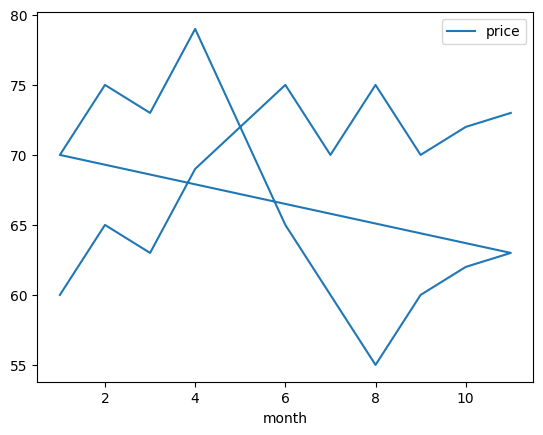

In [110]:
# let's look at our (fake) oil prices from before.

(
    oil_prices
    .set_index('month')
    .plot.line()
)

In [112]:
oil_url = 'https://raw.githubusercontent.com/datasets/oil-prices/refs/heads/main/data/wti-daily.csv'

df = pd.read_csv(oil_url, index_col='Date')

df

,Price
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2026-02-17,62.53
2026-02-18,65.33
2026-02-19,66.66


<Axes: xlabel='Date'>

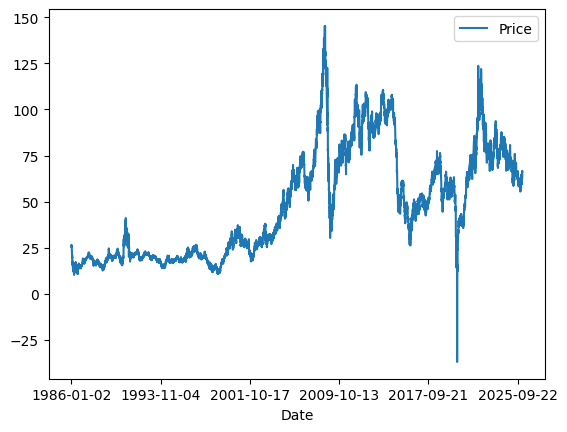

In [113]:
df.plot.line()